In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('titanic.csv')

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Check for missing values
df.isnull().sum()

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' since too many values are missing
df.drop(columns=['Cabin'], inplace=True)

# Drop columns that won't help in prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Check cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


/var/folders/hx/5xfg296n0flg2z6ccj7qzg240000gn/T/ipykernel_72213/3051225442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


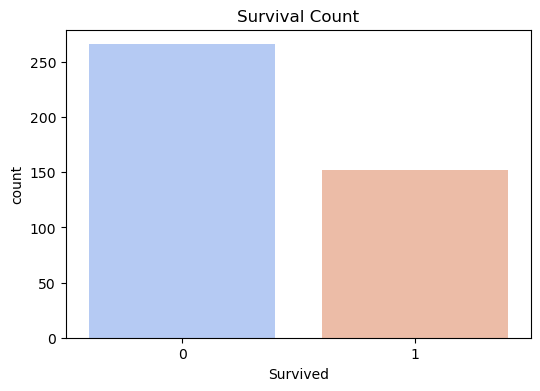

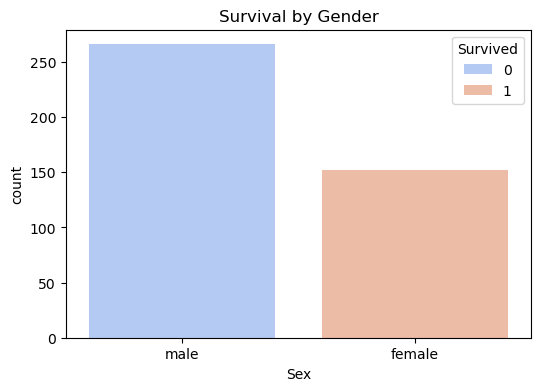

In [4]:
# Countplot of survival
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Survival Count')
plt.show()

#Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()


In [5]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Create Family Size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop 'SibSp' and 'Parch' since FamilySize replaces them
df.drop(columns=['SibSp', 'Parch'], inplace=True)

df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,0,3,34.5,7.8292,True,True,False,1
1,1,3,47.0,7.0000,False,False,True,2
2,0,2,62.0,9.6875,True,True,False,1
3,0,3,27.0,8.6625,True,False,True,1
4,1,3,22.0,12.2875,False,False,True,3


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)